# LangSmith API Key 로드

In [1]:
from dotenv import load_dotenv

load_dotenv()

True

# LangSmith 추적 설정

In [2]:
from utils import logging

logging.langsmith("MultiModal")

LangSmith 추적을 시작합니다.
[프로젝트명]
MultiModal


# 멀티모달 모델(이미지 인식)

멀티모달은 여러 가지 형태의 정보(모달)를 통합하여 처리하는 기술이나 접근 방식을 의미합니다. 

- 텍스트: 문서, 책, 웹 페이지 등의 글자로 된 정보

- 이미지: 사진, 그래픽, 그림 등 시각적 정보

- 오디오: 음성, 음악, 소리 효과 등의 청각적 정보

- 비디오: 동영상 클립, 실시간 스트리밍 등 시각적 및 청각적 정보의 결합

In [4]:
from langchain_openai import ChatOpenAI
from utils.models import MultiModal
from utils.messages import stream_response

# 객체 생성
llm = ChatOpenAI(
    temperature=0.1,  # 창의성 (0.0 ~ 2.0)
    max_tokens=2048,  # 최대 토큰수
    model_name="gpt-4o",  # 모델명
)

# 멀티모달 객체 생성
multimodal_llm = MultiModal(llm)


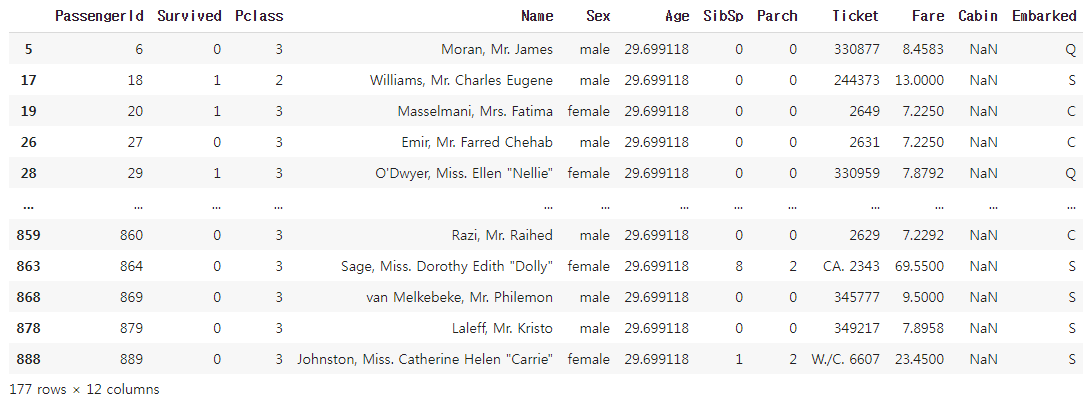

이 이미지는 데이터 테이블의 일부를 보여줍니다. 테이블은 177개의 행과 12개의 열로 구성되어 있습니다. 각 열은 다음과 같은 정보를 포함합니다: PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked. 일부 행의 예시는 다음과 같습니다:

- PassengerId 6: Moran, Mr. James, 남성, 나이 29.699118, 3등급, 요금 8.4583, 탑승지 Q
- PassengerId 18: Williams, Mr. Charles Eugene, 남성, 나이 29.699118, 2등급, 요금 13.0000, 탑승지 S
- PassengerId 29: O'Dwyer, Miss. Ellen "Nellie", 여성, 나이 29.699118, 3등급, 요금 7.8792, 탑승지 Q

이 테이블은 승객의 생존 여부, 탑승 등급, 이름, 성별, 나이, 형제자매/배우자 수, 부모/자녀 수, 티켓 번호, 요금, 객실 번호, 탑승 항구 정보를 포함하고 있습니다.

In [5]:
# 샘플 이미지 주소(웹사이트로 부터 바로 인식)
IMAGE_URL = "https://wikidocs.net/images/page/105104/1-13.png"

# 이미지 파일로 부터 질의
answer = multimodal_llm.stream(IMAGE_URL)
# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)

In [6]:
import os
print(os.getcwd())

c:\Users\selena\songmac\2024-Lecture-Sesac\langchain_env\langchainBasic



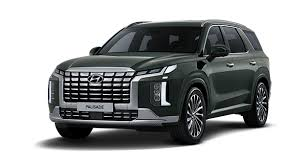

검은색 현대 SUV 차량이 도로 위에 서 있습니다. 차량은 강인하고 현대적인 디자인을 가지고 있으며, 전면 그릴과 헤드라이트가 돋보입니다.

In [7]:
# 로컬 PC 에 저장되어 있는 이미지의 경로 입력
IMAGE_PATH_FROM_FILE = "./images/car1.jpg"

# 이미지 파일로 부터 질의(스트림 방식)
answer = multimodal_llm.stream(IMAGE_PATH_FROM_FILE)
# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)

# System, User 프롬프트 수정

In [8]:
system_prompt = """당신은 강사를 돕는 보조강사 AI 어시스턴트 입니다. 
당신의 임무는 주어진 자료를 바탕으로 수업 자료에 활용할 만한 사실을 정리하여 친절하게 답변하는 것입니다."""

user_prompt = """당신에게 주어진 그림은 LLM 모델의 주요 발전 현황입니다. 학생들에게 도움이 될만한 사실을 정리하여 답변하세요."""

# 멀티모달 객체 생성
multimodal_llm_with_prompt = MultiModal(
    llm, system_prompt=system_prompt, user_prompt=user_prompt
)


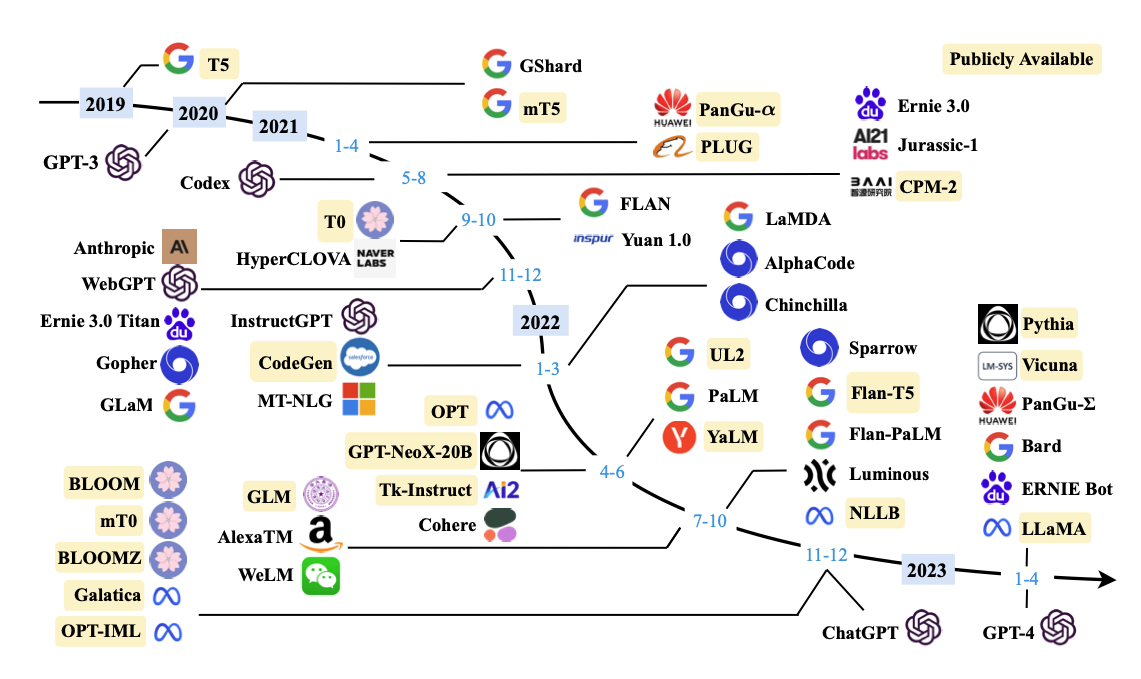

이 이미지는 다양한 인공지능 모델의 발전과 출시 연도를 보여주는 타임라인입니다. 몇 가지 흥미로운 점을 정리해보면:

1. **GPT-3의 영향력**: 2020년에 출시된 GPT-3는 이후 많은 모델들에 영향을 미쳤으며, 다양한 파생 모델들이 개발되었습니다.

2. **다양한 기업의 참여**: Google, OpenAI, Meta, Huawei 등 여러 기업들이 인공지능 모델 개발에 적극적으로 참여하고 있습니다.

3. **공개 모델의 증가**: 시간이 지남에 따라 공개적으로 사용할 수 있는 모델들이 늘어나고 있습니다. 이는 연구와 개발의 투명성을 높이고, 더 많은 사람들이 AI 기술을 활용할 수 있게 합니다.

4. **모델의 다양성**: 언어 모델뿐만 아니라 코드 생성, 대화형 AI 등 다양한 목적을 가진 모델들이 개발되고 있습니다.

5. **최신 모델**: 2023년에는 ChatGPT와 GPT-4가 주목받고 있으며, 이는 최신 기술을 반영한 모델들입니다.

이 타임라인은 AI 기술의 빠른 발전과 다양한 응용 분야로의 확장을 잘 보여줍니다.

In [11]:
# 로컬 PC 에 저장되어 있는 이미지의 경로 입력
IMAGE_PATH_FROM_FILE = "./images/llm_timeline.png"

# 이미지 파일로 부터 질의(스트림 방식)
answer = multimodal_llm_with_prompt.stream(IMAGE_PATH_FROM_FILE)

# 스트리밍 방식으로 각 토큰을 출력합니다. (실시간 출력)
stream_response(answer)